<a href="https://colab.research.google.com/github/VanNguyenThiCam/Code-Math/blob/main/StatisticAndAplication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MEAN

# Lập trình Python tìm giá trị Mean


***Chuẩn bị dữ liệu hình ảnh***

In [33]:
import numpy as np
import cv2

In [60]:
from google.colab import drive #cách lấy dữ liệu trên google.colab 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [35]:
from google.colab.patches import cv2_imshow

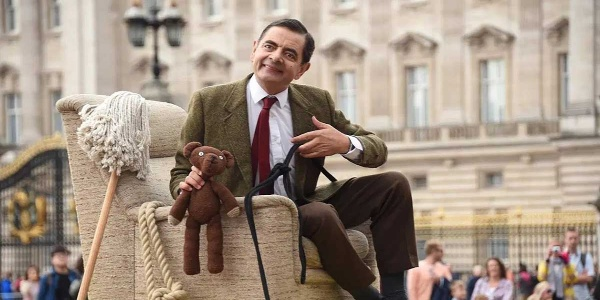

In [36]:
image1 = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/Math/Statistics/mrbeanl.jpg')
cv2_imshow(image1)

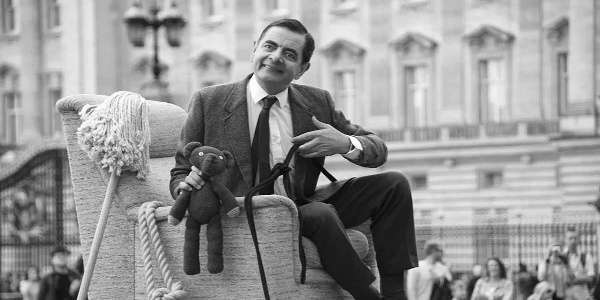

In [37]:
#load ảnh xám lên nên có số 0
image = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/Math/Statistics/mrbeanl.jpg',0)

cv2_imshow(image)

In [38]:
#Tạo kernel
kernel = np.ones((5,5), np.float32) /25.0

In [39]:
#Tính mean cho mỗi pixel
dst = cv2.filter2D(image, cv2.CV_8U, kernel)

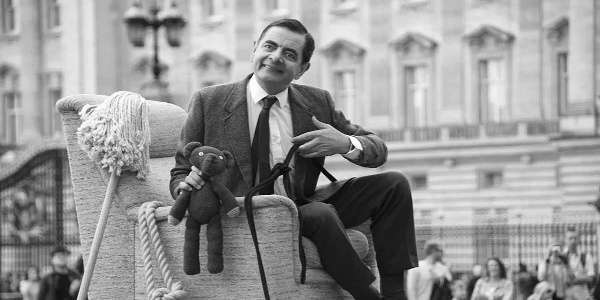

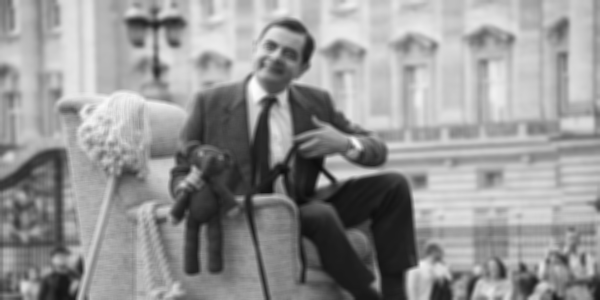

In [40]:
cv2_imshow(image)
cv2_imshow(dst)

***Câu hỏi đặt ra là không muốn làm mờ toàn ảnh mà chỉ làm mờ khuôn mặt người***

# Ứng dụng sử dụng Mean

In [41]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [42]:
image = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/Math/Statistics/mrbean.jpg',0)

In [43]:
kernel = np.ones((5,5), np.float32) / 25.0

In [44]:
#Cho trước giá trị y gốc trên, x gốc trên, chiều cao, chiều rộng

roi = image[40:140,150:280]

In [45]:
roi = cv2.filter2D(roi, cv2.CV_8U, kernel)
image[40:140,150:280] = roi

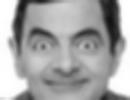

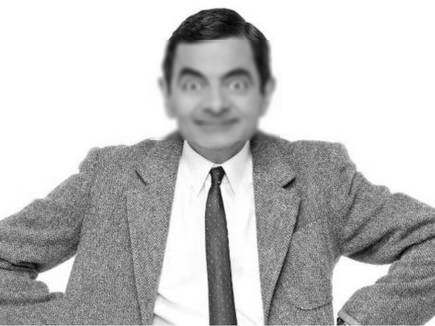

In [46]:
cv2_imshow(roi)
cv2_imshow(image)

#Muốn mờ thì mình mean nhiều lần

In [47]:
import numpy as np
import cv2

face_cascade = cv2.CascadeClassifier('/content/gdrive/MyDrive/Colab Notebooks/Math/Statistics/haarcascade_frontalface_default.xml')

In [48]:
image = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/Math/Statistics/mrbean.jpg',1)

#image = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/Math/Statistics/mrbean.jpg')

#Cả hai cách đều đọc ra ảnh màu


In [49]:
image1 = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/Math/Statistics/mrbean.jpg',0)

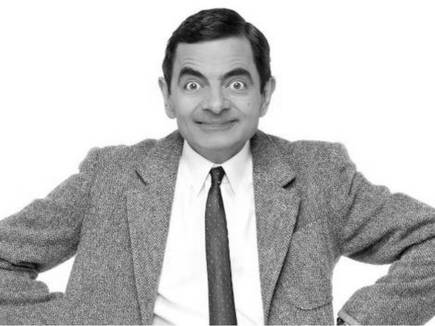

In [50]:
cv2_imshow(image1)

In [51]:
#CÁCH 2 CHUYỂN VỀ ẢNH XÁM
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [52]:
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

In [53]:
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x,y), (x+w,y+h),(0,255,0),1)

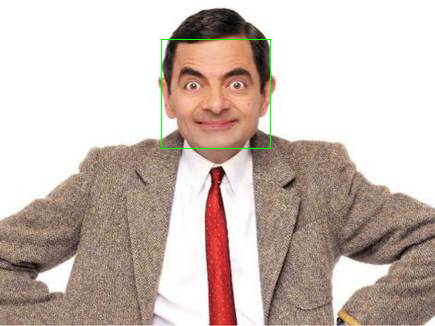

In [54]:
cv2_imshow(image)

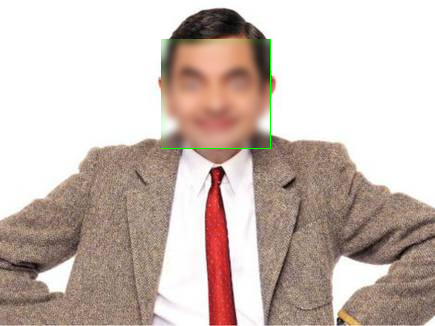

In [55]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
image = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/Math/Statistics/mrbean.jpg',1)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.1, 4)
kernel = np.ones((7,7), np.float32) / 49.0
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x,y), (x+w,y+h),(0,255,0),1)
    roi = image[y:y+h,x:x+w]
    
    roi = cv2.filter2D(roi, cv2.CV_8U, kernel)
    roi = cv2.filter2D(roi, cv2.CV_8U, kernel)
    roi = cv2.filter2D(roi, cv2.CV_8U, kernel)   
    image[y:y+h,x:x+w] = roi

cv2_imshow(image)


# **MEDIAN**

# **VARIANCE**

***Ứng dụng tính chất của variance(~standard deviation) để tìm texture cho một hình***

Áp dụng trên 1 hình ảnh, nó sẽ có các giá trị pixel thì bao gồm tập hợp các giá trị từ 0-255 thì lúc đó mình có thể xử dụng xác suất thống kê vào.

Ta sẽ dùng 1 window để gom các pixel tại 1 vùng cần tính mean, variance, standard deviation...

Những vùng hình cùng màu thì khi nhìn mắt thường mình đã thấy không có độ lệch lớn. Như vậy theo toán học, đặc biệt là standard deviation sẽ cho mình biết là nó sẽ không có độ lệch lớn.

Nếu mà thông tin texture ít nghĩa là những điểm pixel trong vùng window có màu giống nhau tức là standard deviation nhỏ( độ lệch nhỏ). 


1.   Cần thông tin bằng số, công thức thì mình dùng variance để lấy texture.

2.   Sự khác biệt giữa **texture** và **egde detection**.

*   **texture** : quan tâm đến vùng ảnh đó có thay đổi hay không. 

*   **egde detection:** Quan tâm đến cạnh.

3.    Có thể dùng thông tin texture để đi tìm egde detection.





In [56]:
import numpy as np
import cv2
import math
import scipy.ndimage.filters import generic_filter

SyntaxError: ignored

# **CORRELATION COEFFICIENT (HỆ SỐ TƯƠNG QUAN)**

***Ứng dụng cho patch matching***

Giả sử dữ liệu của pixel là ngẫu nhiên. Ta áp dụng lý thuyết xstk vào, cụ thể là dùng hệ số tương quan tính từng cặp hình xem chúng có tương quan với nhau không.

In [57]:
def find_corr_x_y(x,y):
    n = len(x)
    prob = []
    for xi,yi in zip(x,y):
        prob.append(xi*yi)

    sum_prob_x_y = sum(prob)

    sum_x = sum(x)
    sum_y = sum(y)

    squared_sum_x = sum_x**2
    squared_sum_y = sum_y**2

    x_square = []
    for xi in x:
        x_square.append(xi**2)
    x_square_sum = sum(x_square)
    y_square = []
    for yi in y:
        y_square.append(yi**2)
    y_square_sum = sum(y_square)

#công thức tính hệ số tương quan
    numerator = n*sum_prob_x_y - sum_x*sum_y
    denominator_term1 = n*x_square_sum - squared_sum_x
    denominator_term2 = n*x_square_sum - squared_sum_y
    denominator_term = (denominator_term1 * denominator_term2)**0.5
    correlation = numerator/denominator_term

    return correlation 

In [58]:
x = [7,18,29,2,10,9,9]
y = [1,6,12,8,6,21,10]
y2 = []
for i in y:
    y2.append(i*2+1)
print(y2)

print('Hệ số tương quan tuyến tính giữa 2 biến x,y', find_corr_x_y(x,y))
print('Hệ số tương quan tuyến tính giữa 2 biến x,y', find_corr_x_y(x,y2))

[3, 13, 25, 17, 13, 43, 21]
Hệ số tương quan tuyến tính giữa 2 biến x,y 0.07693467978184795
Hệ số tương quan tuyến tính giữa 2 biến x,y (8.408325454973524e-18-0.13731837556473797j)


In [61]:
import numpy as np
from PIL import Image

image1 = Image.open('/content/gdrive/MyDrive/Colab Notebooks/Math/Statistics/IMG_3017.JPG')

image1_list = np.asarray(image1).flatten().tolist() #duỗi hình ra thành vecto 
image2_list = image1_list.copy()

corr = find_corr_x_y(image1_list,image2_list)
print(corr)

1.0
